In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np 

In [2]:
scv.settings.verbosity = 3  
scv.settings.presenter_view = True 
scv.set_figure_params('scvelo') 

In [3]:
adata1 = scv.datasets.pancreas()

In [4]:
adata1

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


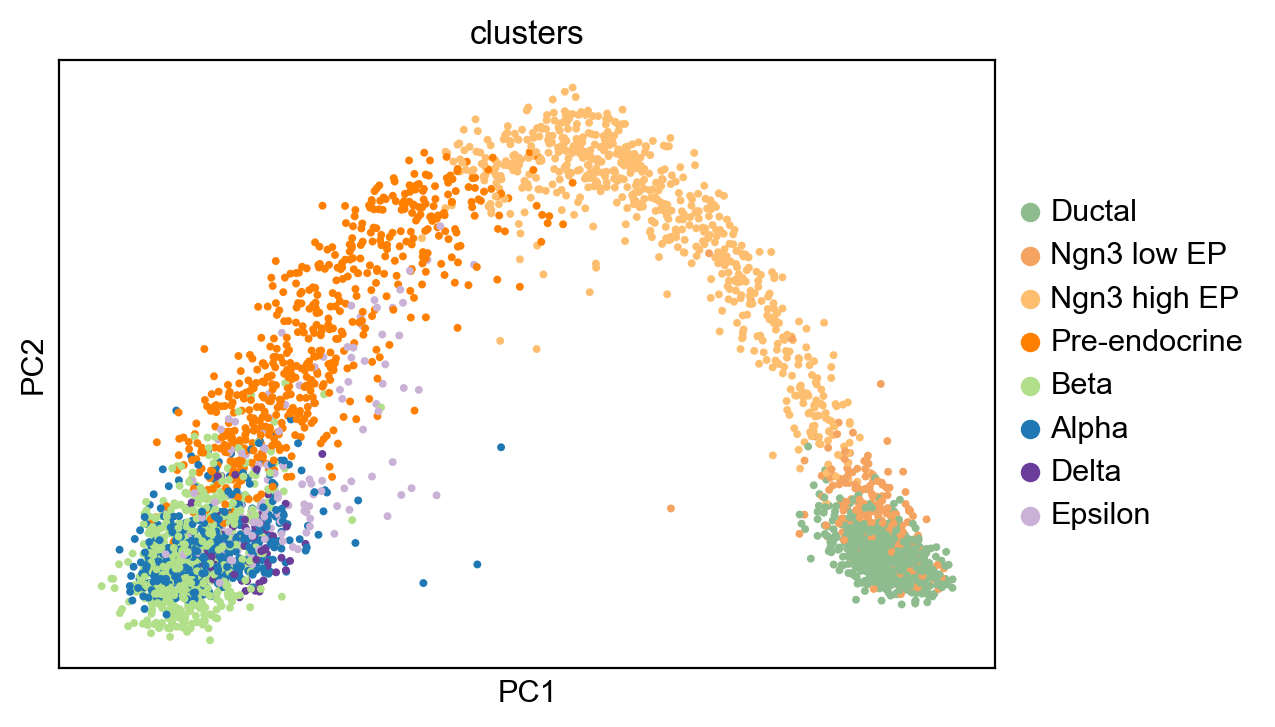

In [5]:
scv.pp.filter_genes(adata1, min_shared_counts=20)
scv.pp.normalize_per_cell(adata1)
scv.pp.filter_genes_dispersion(adata1, n_top_genes=2000)
scv.pp.log1p(adata1)
scv.pp.pca(adata1)
sc.pl.pca(adata1, color = "clusters")
# scv.pp.moments(adata1, n_pcs=30, n_neighbors=20)

In [6]:
adata1.uns['neighbors']

OverloadedDict, wrapping:
	{'params': {'method': array(['umap'], dtype=object), 'n_neighbors': array([15])}}
With overloaded keys:
	['connectivities', 'distances'].

In [7]:
scv.pp.moments(adata1, n_neighbors =50)
adata1.uns['neighbors']

computing neighbors


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'indices': array([[   0,  889, 3051, ..., 1479, 2456,  324],
       [   1, 1807,  950, ..., 1667, 3468,  937],
       [   2, 1215, 3500, ..., 1827, 1068, 1177],
       ...,
       [3693, 1591,  743, ..., 2589,  455,    9],
       [3694, 2172, 3446, ..., 1624, 1242, 1664],
       [3695, 2764, 2978, ..., 3103, 2868, 3641]]), 'params': {'n_neighbors': 50, 'method': 'umap', 'metric': 'euclidean', 'n_pcs': None, 'use_rep': 'X_pca'}}
With overloaded keys:
	['connectivities', 'distances'].

In [8]:
adata1.uns['neighbors']['params']

{'n_neighbors': 50,
 'method': 'umap',
 'metric': 'euclidean',
 'n_pcs': None,
 'use_rep': 'X_pca'}

In [9]:
scv.tl.recover_dynamics(adata1,n_jobs=10)

recovering dynamics (using 10/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:03:01) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [10]:
scv.tl.velocity(adata1, mode="dynamical")

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.velocity_graph(adata1)

computing velocity graph (using 1/12 cores)
    finished (0:00:12) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


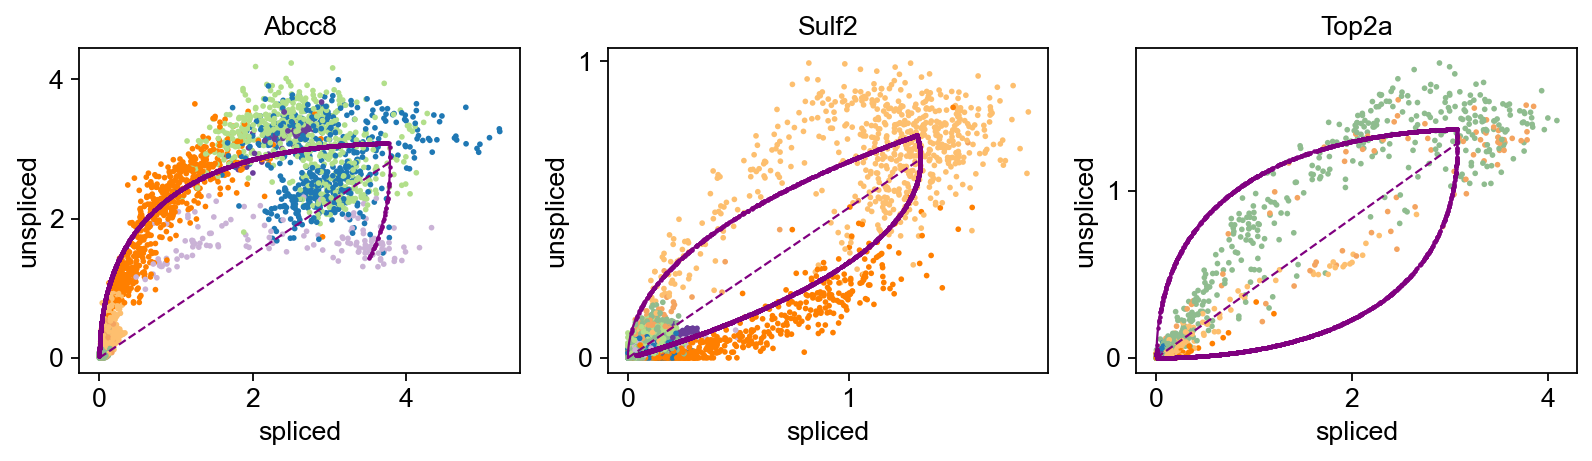

In [12]:
scv.pl.scatter(adata1, basis=['Abcc8','Sulf2','Top2a'],color='clusters', use_raw=False)

In [13]:
adata1

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'loss'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


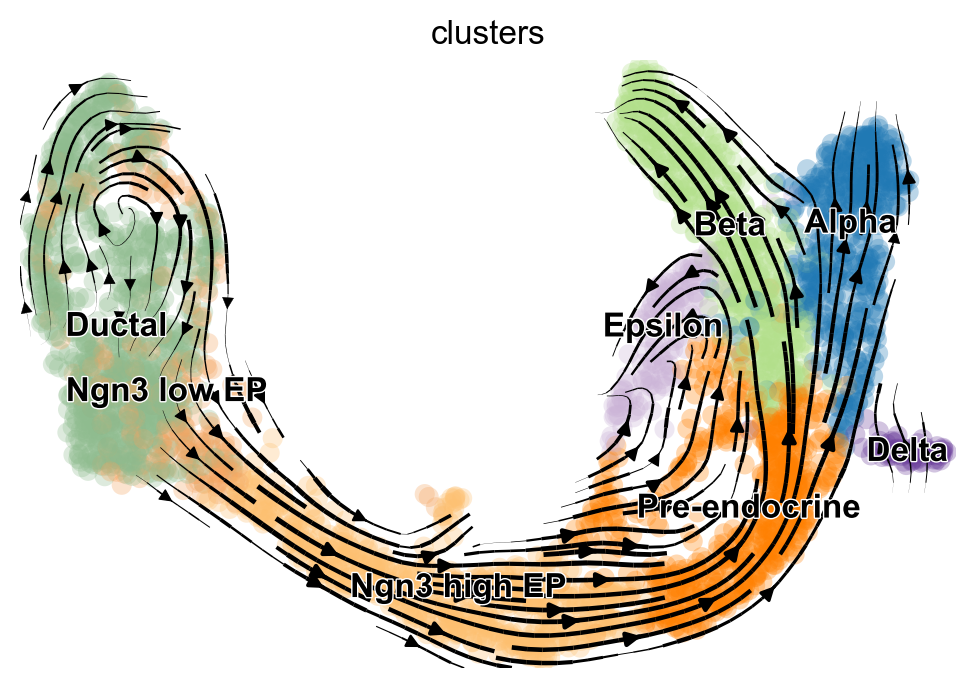

In [14]:
scv.pl.velocity_embedding_stream(adata1, basis='umap')

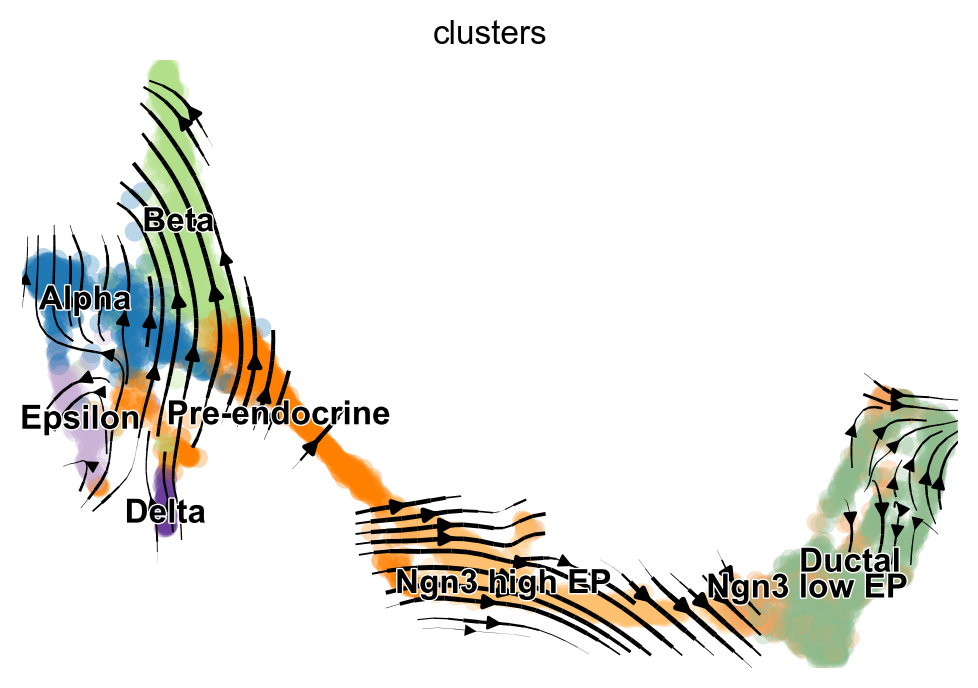

In [15]:
scv.tl.umap(adata1, min_dist=0.1)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

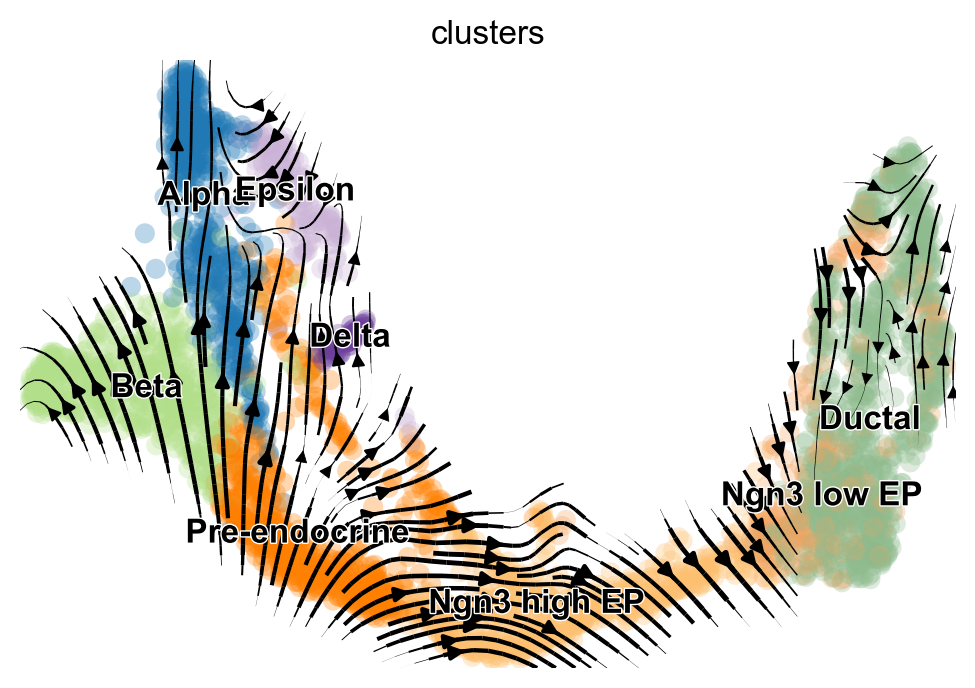

In [16]:
scv.tl.umap(adata1, min_dist=0.3)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

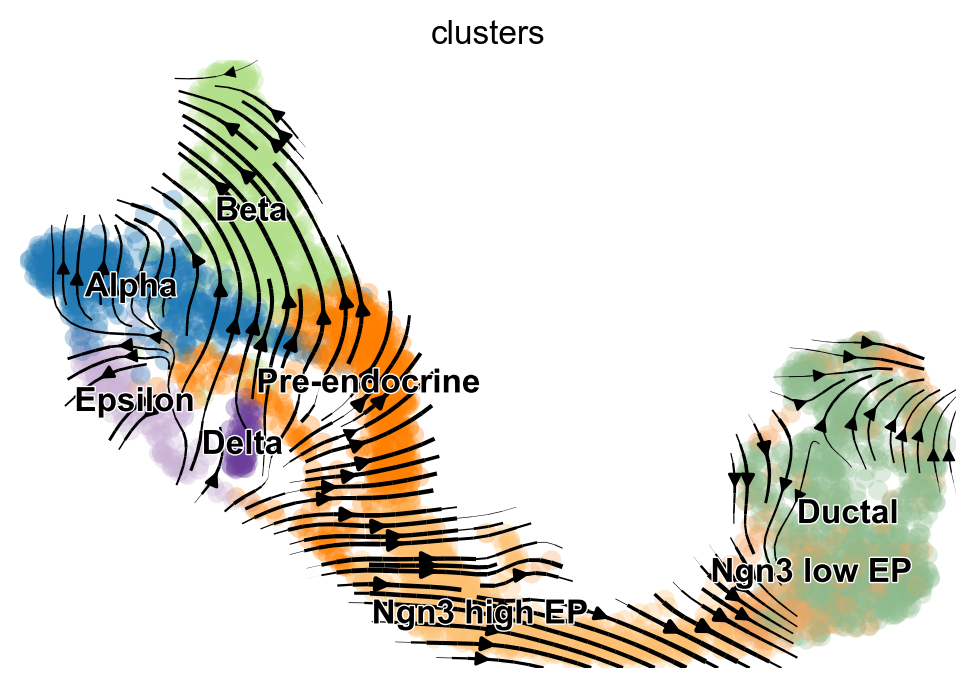

In [17]:
scv.tl.umap(adata1, min_dist=0.5)
scv.pl.velocity_embedding_stream(adata1, basis='umap')


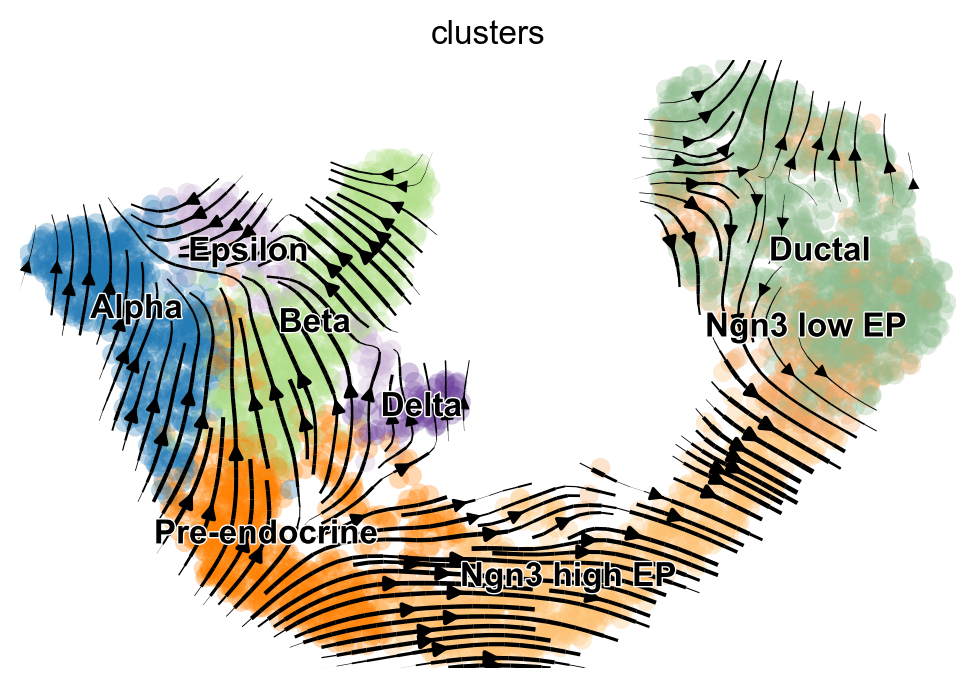

In [18]:
scv.tl.umap(adata1, min_dist=1)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

In [19]:
scv.__version__

'0.2.4'

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/12 cores)
    finished (0:02:24) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


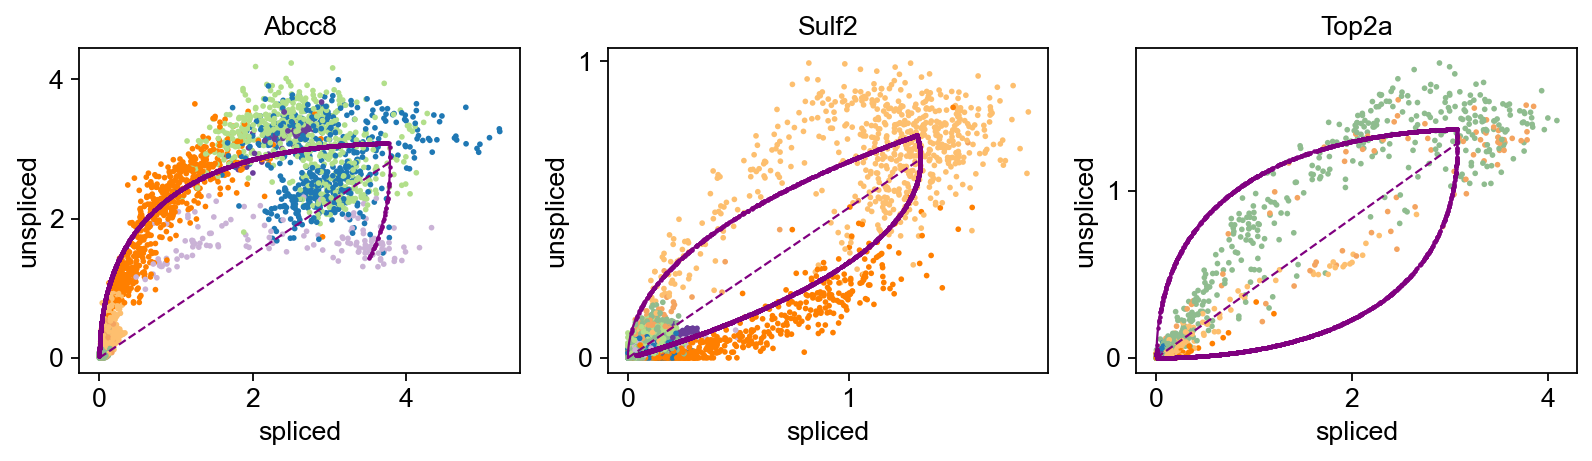

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


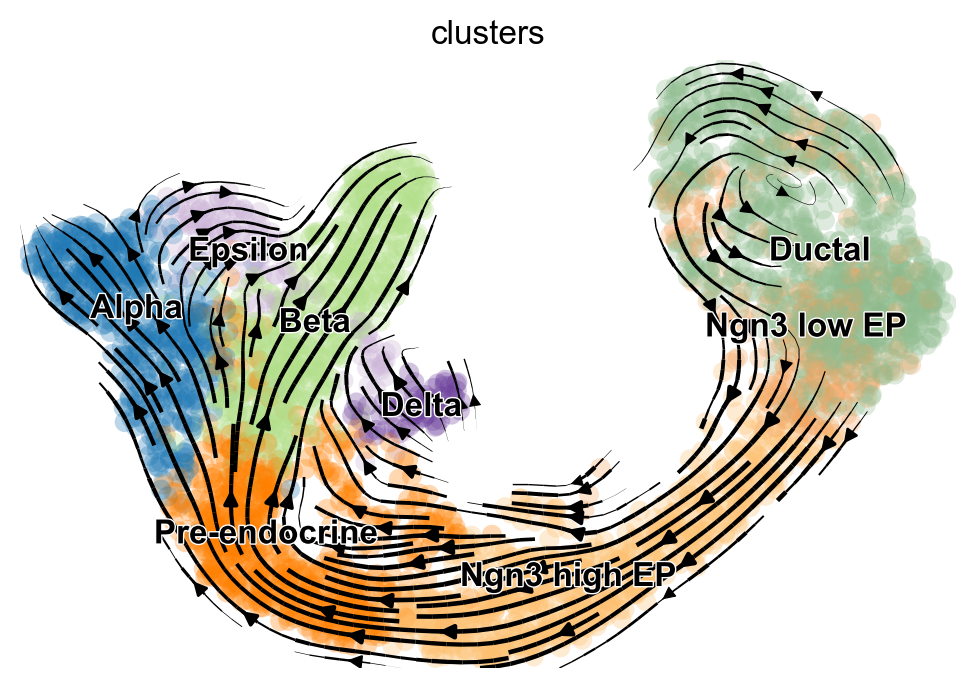

In [20]:
# rerun
scv.pp.moments(adata1, n_neighbors =50)
adata1.uns['neighbors']
scv.tl.recover_dynamics(adata1,n_jobs=10)
scv.tl.velocity(adata1, mode="dynamical")
scv.tl.velocity_graph(adata1)
scv.pl.scatter(adata1, basis=['Abcc8','Sulf2','Top2a'],color='clusters', use_raw=False)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

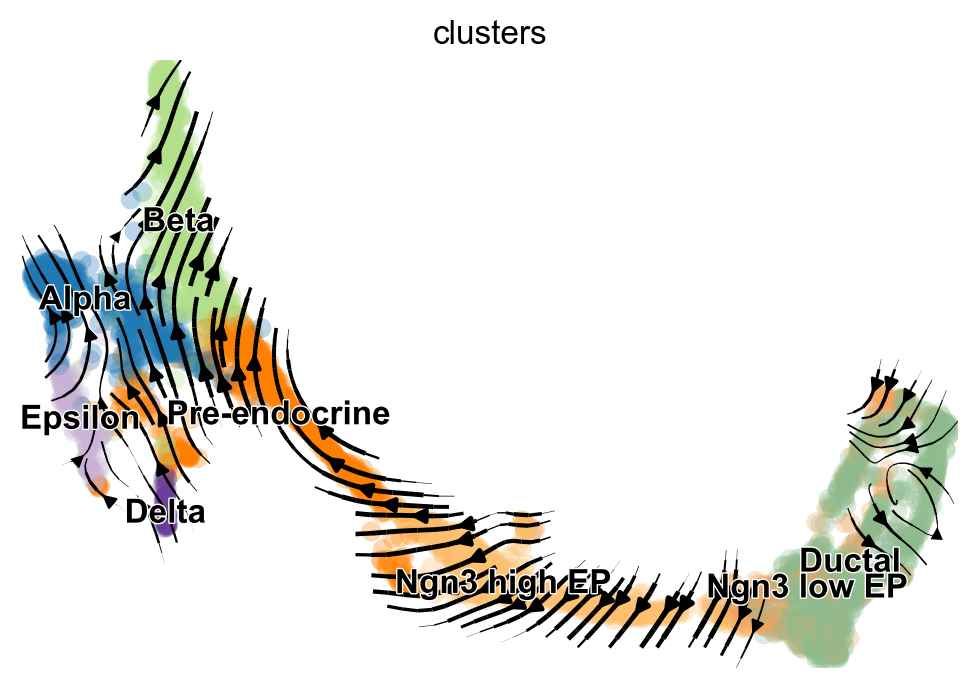

In [21]:
scv.tl.umap(adata1, min_dist=0.1)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

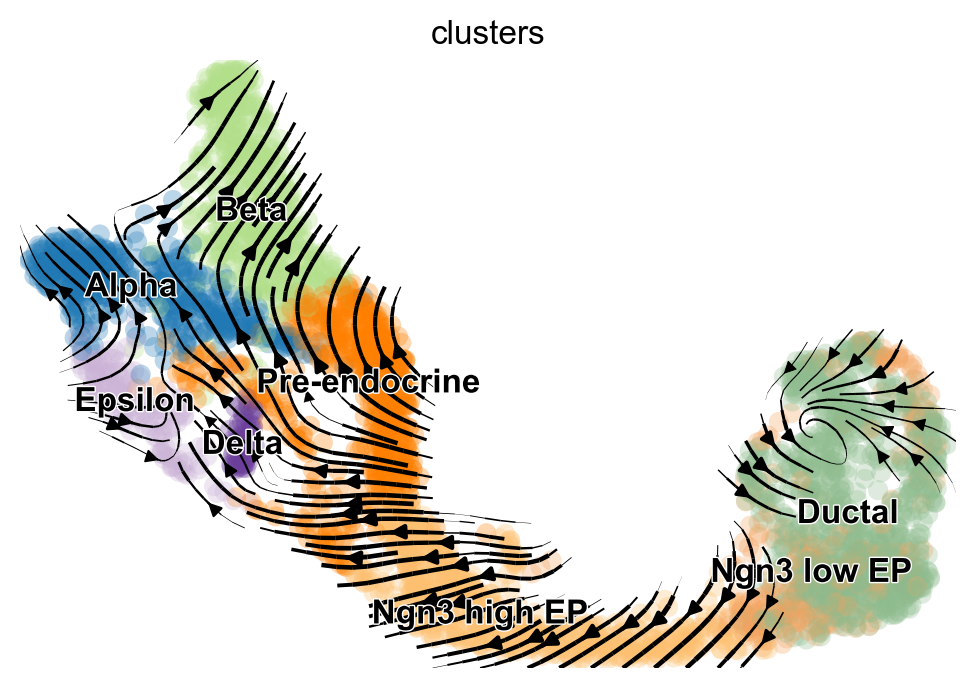

In [22]:
scv.tl.umap(adata1, min_dist=0.5)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

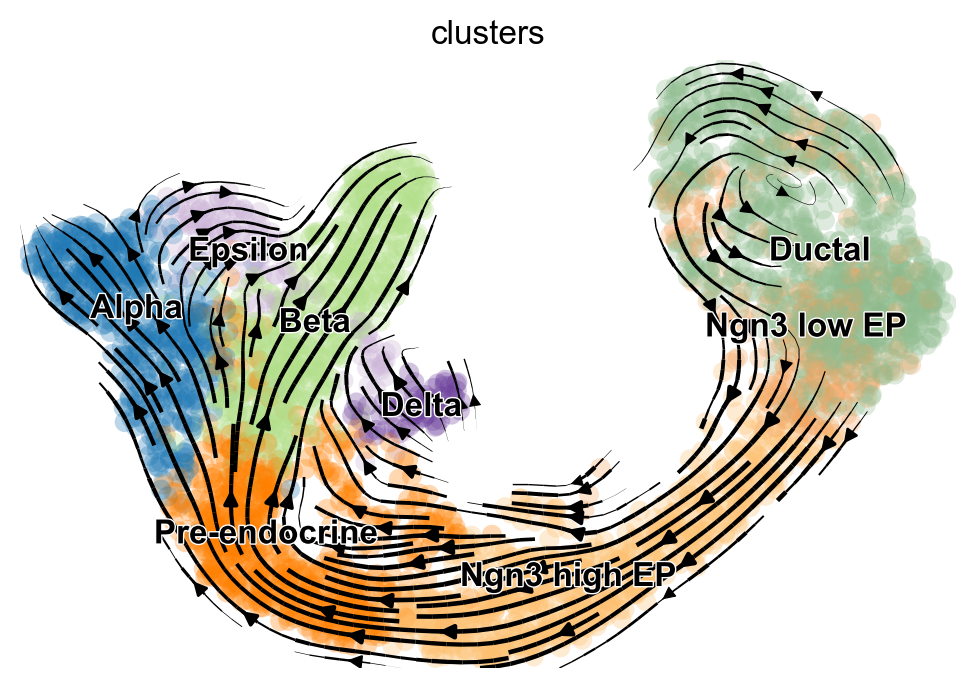

In [23]:
scv.tl.umap(adata1, min_dist=1)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

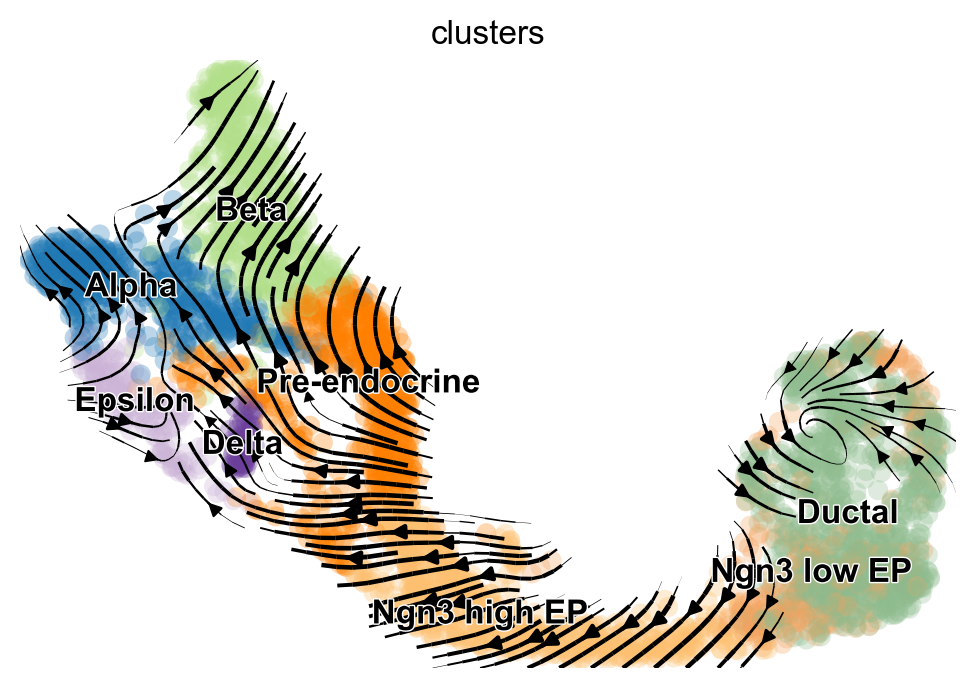

In [24]:
scv.tl.umap(adata1, min_dist=0.5)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

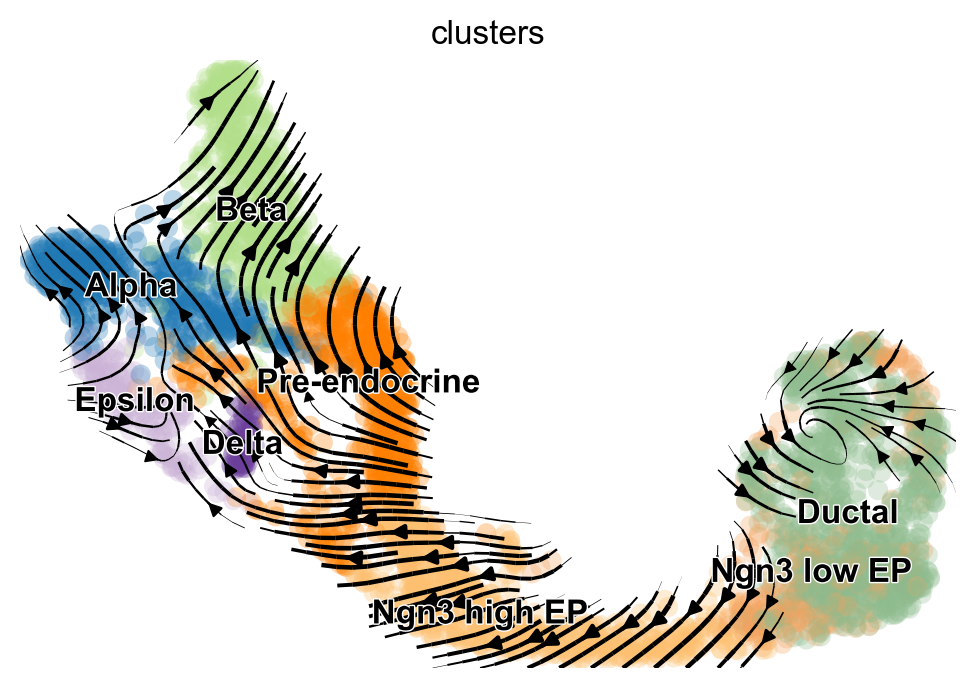

In [25]:
scv.tl.umap(adata1, min_dist=0.5)
scv.pl.velocity_embedding_stream(adata1, basis='umap')

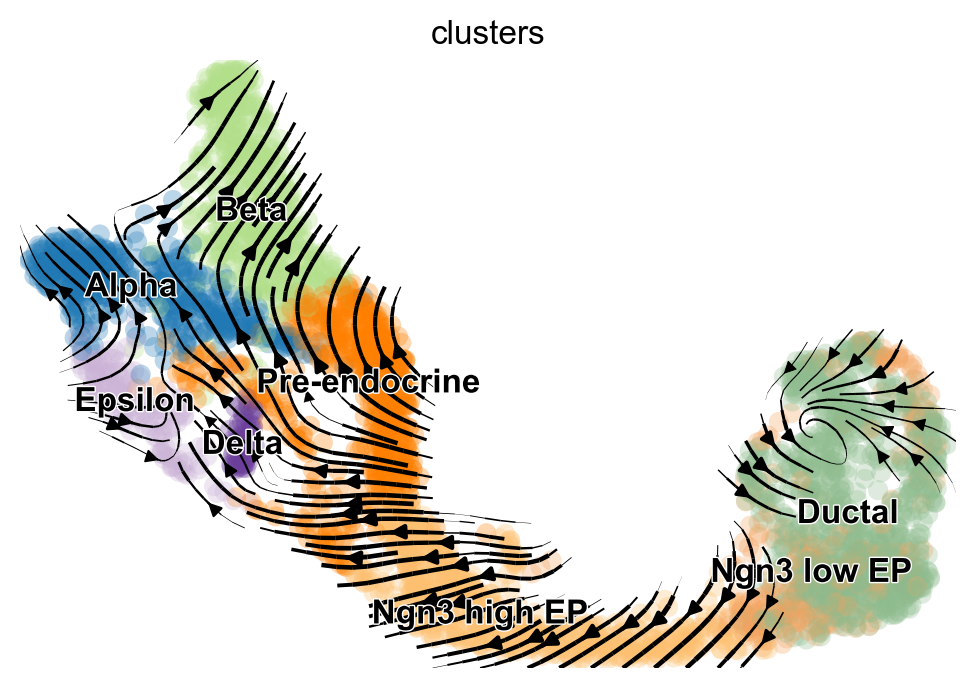

In [26]:
scv.tl.umap(adata1)
scv.pl.velocity_embedding_stream(adata1, basis='umap')